# Data Visualization; Exploratory Analysis

In [ ]:
from google.colab import files
import pandas as pd
import io
from IPython.display import Image, display


import matplotlib.pyplot as plt

In [ ]:
# takes about 45 seconds, read from csv
# uploaded = files.upload() #just upload 1 file, download from here: https://drive.google.com/drive/folders/18dEvVuQrfJRZP2pSZLhCIHLQMAJomKVr
# #many cells assume using v2
# df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

In [ ]:
# takes about 30 seconds, read from sql
# Install the SQLAlchemy library if it is not installed
!sudo apt-get install python3-dev libmysqlclient-dev > /dev/null
!pip install mysqlclient > /dev/null
!sudo pip3 install -U sql_magic > /dev/null
!pip install psycopg2-binary > /dev/null

from sqlalchemy import create_engine

# Connect to the MySQL, but without selecting a database
conn_string = 'mysql://{user}:{password}@{host}:{port}/{db}?charset={encoding}'.format(
    user='team', 
    password='tbmFmVOE6gg=', 
    host = 'jsedocc7.scrc.nyu.edu', 
    port     = 3306, 
    encoding = 'utf8',
    db = 'Team'
)
engine = create_engine(conn_string)
df = pd.read_sql('SELECT * FROM jobdata', con=engine)

In [ ]:
display(df.sample(5))

,index,title,cat,comp,loc,desc,redURL,lon,lat,pstDate,salaryPredicted,levels,API,State,work,hardskills,softskills,education
1641,1641,Tax Expert - CPA or EA - Work from Home,Accounting & Finance Jobs,Intuit,"Highland Park, Dallas","Overview Are you a credentialed CPA, EA, or pr...",https://www.adzuna.com/land/ad/3695382030?se=_...,-96.772476,32.841987,2022-11-16,0,None,adzuna,Texas,Every single Amazon product page is a microcos...,Our best experts will be solving complex tax i...,Top 10 Job Interview Tips for Job seekers\n\nH...,Job Online on Website: https://www.careerbuild...
943,943,DoD SkillBridge Internship - Technical Sales -...,Sales,Siemens,St. Louis,DoD SkillBridge Internship - Technical Sales/B...,https://www.themuse.com/jobs/siemens/dod-skill...,-90.315253,38.610135,2022-10-17,0,Internship,themuse,Missouri,You will be part of a team developing technolo...,"(i.e. skills, education, training, work experi...",Answer to this question is required. List fi...,"&lt;/p&gt; &lt;/div&gt;</p>"","
1664,1664,Automotive Technician,Engineering Jobs,Herb Chambers Porsche,"Lexington, Middlesex County",Herb Chambers Porsche of Boston is looking for...,https://www.adzuna.com/land/ad/3675645752?se=Y...,-71.232202,42.435368,2022-11-09,0,None,adzuna,Massachusetts,Evaluates mechanical and electrical systems an...,"Even if you don’t have any experience, you can...",What are the most important soft skills do you...,What education do you need to work in this pos...
703,703,Project Manager 3 - Capital Imaging Equipment ...,Project Management,Siemens,Minneapolis,Do you want to join us in helping to fight the...,https://www.themuse.com/jobs/siemens/project-m...,-93.261602,44.970518,2022-11-04,0,Senior Level,themuse,Minnesota,We will give you the chance to contribute to o...,Siemens Healthineers is looking for a Project ...,The most important soft skills for success are...,A minimum of 5 years of complex project manage...
646,646,Senior Process Engineer,Science and Engineering,Siemens,Norwood,Now's our time to inspire the future of health...,https://www.themuse.com/jobs/siemens/senior-pr...,-71.196587,42.181783,2022-11-15,0,Senior Level,themuse,Massachusetts,We are looking for a Senior Process Engineer t...,ADDITIONAL RESPONSIBILITIES: Translate pro...,* Active Listening * Active Learning * Critica...,"Bachelor's degree in Engineering, Chemical Eng..."


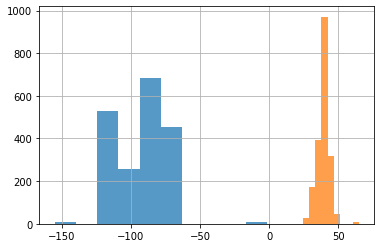

In [ ]:
df["lon"].hist(alpha=0.75)
df["lat"].hist(alpha=0.75)

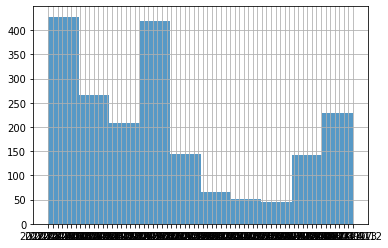

In [ ]:
df["pstDate"].hist(alpha=0.75)

In [ ]:
print(min(df["pstDate"]))

2022-08-05


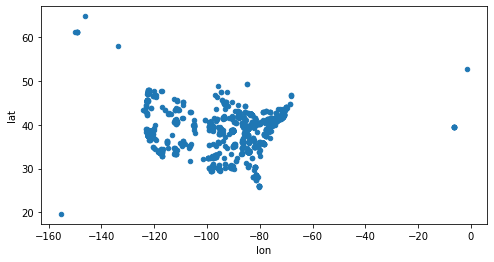

In [ ]:
df.plot(x='lon', y='lat', kind='scatter', figsize=(8,4))

#citibike plot: https://colab.research.google.com/drive/1pI_iBtgO-THuwPoK0RGG3P2I1mB2kS1n?usp=sharing#scrollTo=68HJ2Bva4qiD

In [ ]:
df['pstDate'] = pd.to_datetime(df['pstDate'])

In [ ]:
import math
import folium
from datetime import datetime
from sqlalchemy.util import NoneType

fmap = folium.Map(location=[40.73, -95], zoom_start=5,  tiles='cartodbpositron')

nonGraphed = []

for name, row in df.iterrows():
    # if row["lon"] > -40:
    #   print(row)

    opacity = .25
    color = "green" if row["comp"] == 'Siemens' else ("pink" if row["comp"] == 'Lyft' else ("blue" if row["comp"] == 'AMR' else ("orange" if row["comp"] == "Amazon Delivery Service Partners" else "yellow")))

    size = 10
    popupHeight = 300
    html = """<p style='font-family:sans-serif;font-size:11px'>"""
    for lbl, val in row.iteritems():
      if (lbl == "redURL"):
        html += "<a href="+val+">redirect url</a> <br>"
      elif not (lbl =="index" or lbl == "desc"):
        if type(val) != NoneType:
          html += "<strong>"+lbl+": </strong>" + str(val) + "<br>"
        else:
          popupHeight-=25

    popup = folium.Popup(folium.IFrame(html=html, width=300, height=popupHeight), max_width=200)

    # We create a marker on the map and we add it to the map
    if not math.isnan(row["lat"]):
      folium.CircleMarker(location=[row["lat"], row["lon"]], 
                          radius = size,
                          color='black', weight=0.5, 
                          popup = popup,
                          fill=True,
                          fill_opacity = opacity,
                          fill_color = color,
                        ).add_to(fmap)
    else:
      nonGraphed.append(html)
fmap

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(len(nonGraphed))

65


In [ ]:
from IPython.core.display import HTML, display
for nonGr in nonGraphed:
  display(HTML(nonGr))

In [ ]:
def myPie(nums, names, col):
    #pie chart:
  # numbers from https://stackoverflow.com/questions/72338356/how-to-show-values-in-pandas-pie-chart
  # labels from https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
  
  fig, ax = plt.subplots(figsize=(32, 8), subplot_kw=dict(aspect="equal"))
  wedges, texts, autotexts = ax.pie(nums, autopct=lambda pct: str(int(pct/100.*np.sum(nums))), textprops=dict(color="w"))

  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")
  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      kw["arrowprops"].update({"connectionstyle": connectionstyle})
      ax.annotate(names[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                  horizontalalignment=horizontalalignment, **kw)

  # ax.legend(wedges, names,
  #           title="States",
  #           loc="center left",
  #           bbox_to_anchor=(1, 0, 0.5, 1))
  plt.setp(autotexts, size=8, weight="light") #weight could be bold
  ax.set_title("Job Postings Per " + col)
  plt.show()

In [ ]:
def myBar(nums, names, col):
  #https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

  # Figure Size
  fig, ax = plt.subplots(figsize =(16, 9))
  # Horizontal Bar Plot
  ax.barh(names, nums)

  # Remove axes splines
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)
  # Remove x, y Ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  
  # Show top values
  ax.invert_yaxis()
  
  # Add annotation to bars
  for i in ax.patches:
      plt.text(i.get_width()+0.2, i.get_y()+0.5,
              str(round((i.get_width()), 2)),
              fontsize = 8, fontweight ='bold',
              color ='grey')
  
  # Add Plot Title
  ax.set_title('Job Postings Per ' + col,
              loc ='left', )
  
  # Show Plot
  plt.show()

In [ ]:
def plotValCnt(col):
  nums = []
  names = []
  series = df[col].value_counts()
  valCntDF = pd.DataFrame(series)
  # print(valCntDF.columns)
  for i, row in valCntDF.iterrows():
    names.append(i)
    nums.append(row[0])

  # valCntDF = pd.DataFrame({'count': nums},
  #                   index=names)
  # print(series)
  # plot = valCntDF.plot.pie(y='count', figsize=(10, 10))
  
  myPie(nums, names, col)
  myBar(nums, names, col)



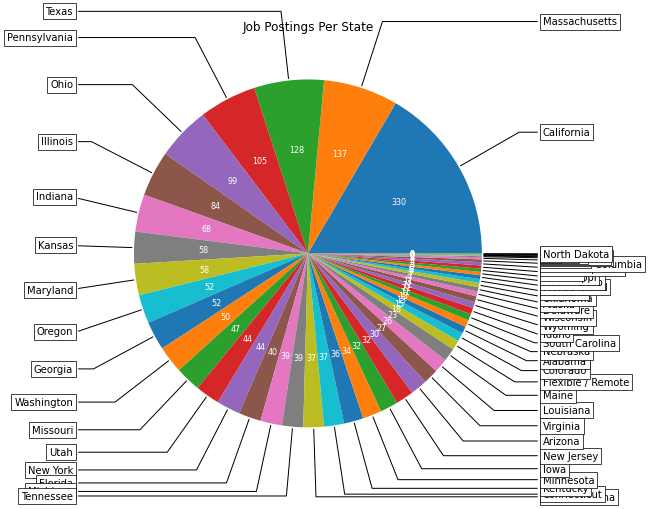

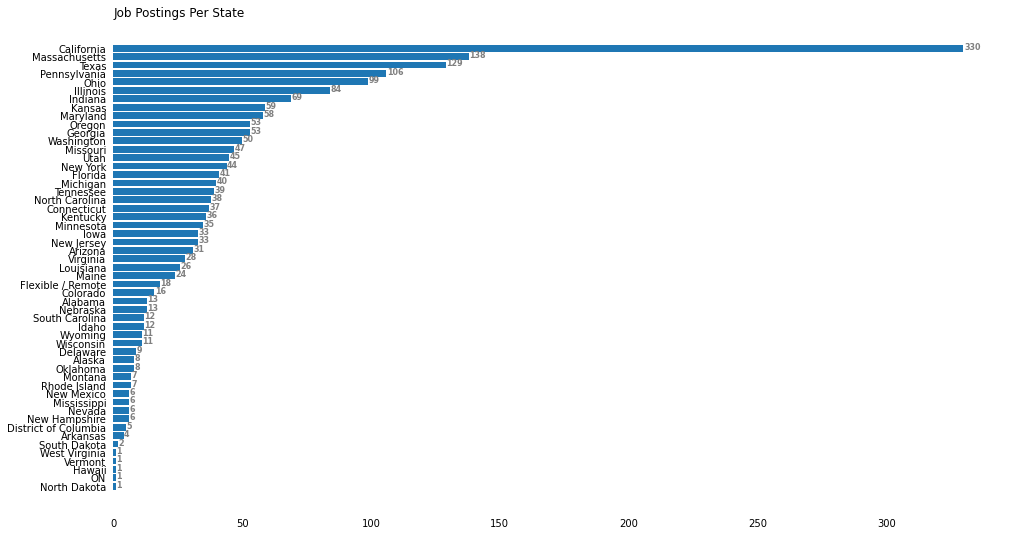

In [ ]:
plotValCnt('State')

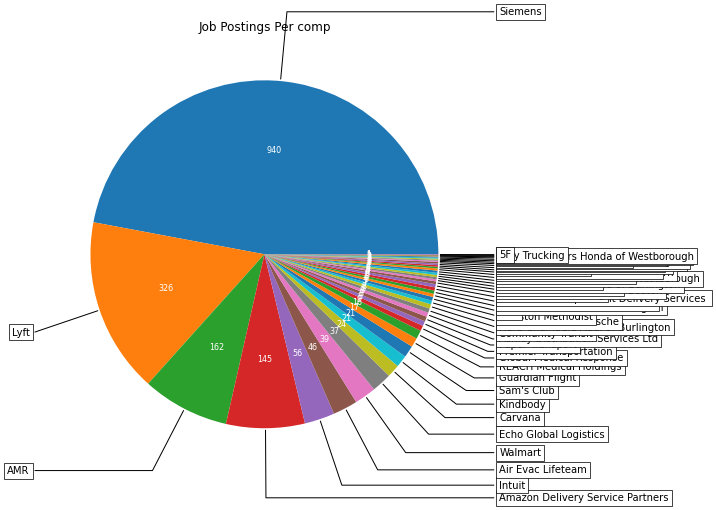

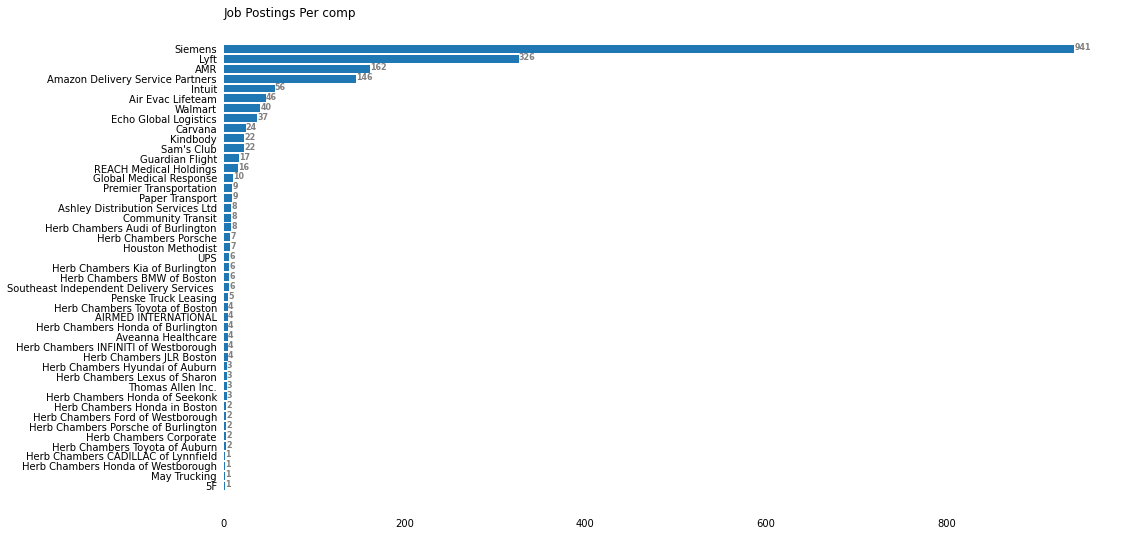

In [ ]:
plotValCnt('comp')

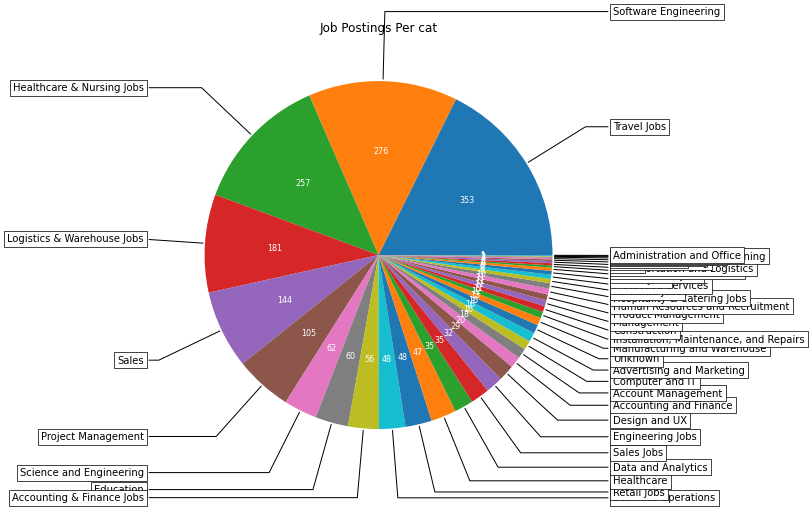

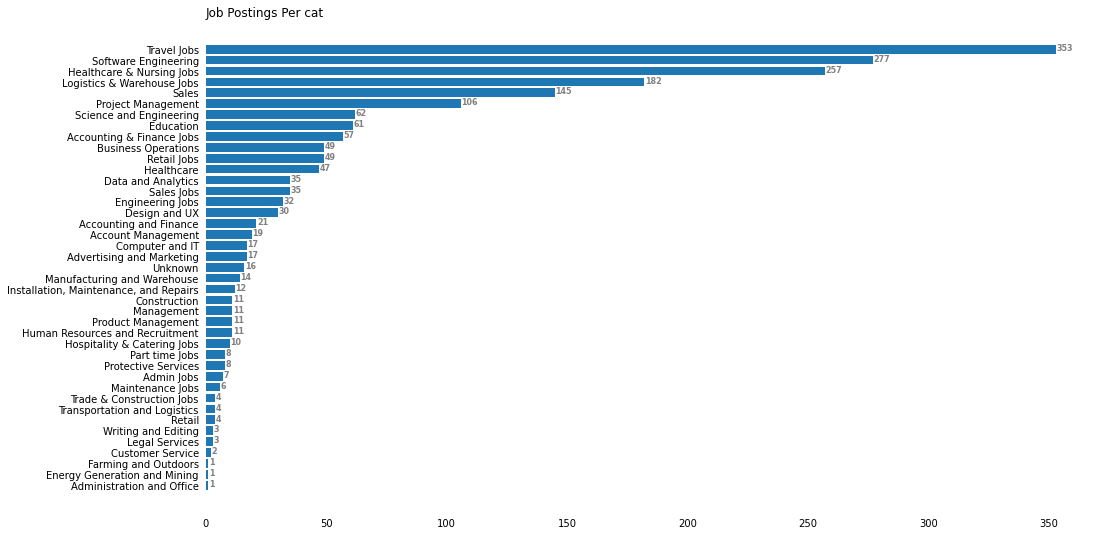

In [ ]:
plotValCnt('cat')